# Probability
A theoretical reference notebook with examples in R.

## Definitions

### Sample space
A sample space $\Omega$ is the set of all possible observations of a process or experiment. An event is a subset of the sample space. The probability of an event is a function that maps the event to a real number in the interval $[0,1]$. The probability function follows the Kolmogorov's axioms.

### Joint probability
Given a vector variable y in the sample space and a parameter vector $\theta$ in the parameter space, $P(y = y_k, \theta = \theta_j)$, or simply $P(y_k, \theta_j)$, represents the joint probability of a sample in which $y = y_k$ and $\theta = \theta_j$. The variable $y_k$ may depend on some other variables.   

If the components of the sample vector x are independent variables, e.g. uncorrelated events, then  
$P(x_k, \theta_j) = \prod_{i} P(x_{k,i}, \theta_j)$

### Conditional probability

$P(x_k,\theta_j) = P(\theta_j|x_k)P(x_k)$  
$P(x_k,\theta_j) = P(x_k|\theta_j)P(\theta_j)$


### Marginal probability

$P(\theta_j) = \sum_{k} P(\theta_j|x_k)P(x_k)$  
$P(x_k) = \sum_{j} P(x_k|\theta_j)P(\theta_j)$

## Bayes rule
In Bayesian statistics data are the observed variables and paramenters are the unobserved variables.  

$$P(x_{k}|\theta_{j})P(\theta_{j}) = P(\theta_{j}| x_{k})P(x_{k})$$

$$P(\theta_{j}| x_{k}) = \frac{P(x_{k}|\theta_{j})P(\theta_{j})}{P(x_{k})}$$

$$P(\theta_{j}| x_{k}) = \frac{P(x_{k}|\theta_{j})P(\theta_{j})}{\sum_{i} P(x_k|\theta_i)P(\theta_i)}$$

$P(\theta_j)$ is called the prior probability and represents the probability of $\theta$ before we see any data.  
$P(x_k|\theta_j)$ is called the likelihood and represents the probability of any mathematically plausible value of $\theta$.    
$P(x_k)$ is called the marginal probability  
$P(\theta_j|x_k)$ is called the posterior probability  

|           |$\theta_1$|$\theta_2$|$\theta_3$|$\theta_4$|
|-----------|-----------|----------|---------|----------|
|$x_1$      |$P(x_1,\theta_1)$|$P(x_1,\theta_2)$|$P(x_1,\theta_3)$|$P(x_1,\theta_4)$|
|$x_2$      |$P(x_2,\theta_1)$|$P(x_2,\theta_2)$|$P(x_2,\theta_3)$|$P(x_2,\theta_4)$|
|$x_3$      |$P(x_3,\theta_1)$|$P(x_3,\theta_2)$|$P(x_3,\theta_3)$|$P(x_3,\theta_4)$|
|$x_4$      |$P(x_4,\theta_1)$|$P(x_4,\theta_2)$|$P(x_4,\theta_3)$|$P(x_4,\theta_4)$|

## Distributions
Distributions are used to represent priors and likelihoods when building a model. A first differentiation is between discrete and continuous distributions. Discrete distributions are used to represent proceses whose data are integers numbers. Continuous distributions are used to represent processes whose data are real numbers. Another characteristic that guides us to choose a distribution is the scale type, the type of values we are going to deal with. Some continuous distributions are defined in an closed interval, e.g. $[0, 1]$ or infinite, e.g. $[0, + \infty)$. The discrete Bernoulli distribution is defined in the set {0, 1}. There exist many standard distributions used for the analysis of experiments or observations that are shown in the next sections. When it is used to represent the likelihood, a distribution is selected also depending on the sampling method or stop rule, that is the rule that applies when we collect a sample. The two main sampling methods, or stop rules, are set or by the number of events, that is the sample size, or by the time used to gather the data of the sample. For example the binomial distribution is used when our sample has a specific size. The same applies for the normal distribution, the bernoulli distribution and others. The Poisson disribution and the exponential distribution are used when the stop rule is the time, or the space, between events. The likelihood represents all the possible states in which our system can be found. The data in our sample tell us which of all those possible states are more or less likely taking into account what we already know about the system before we start to collect the data and that is represented by the prior distribution.

### Binomial distribution
A sample of the discrete binomial distribution is characterized by  
*n* the number of events (e.g. tosses of a coin)  
*k* the number of successes (e.g. heads)  
*p* the probability of success in a toss

$$Binomial(k, n, \theta) = \binom{n}{k}\theta^k(1 - \theta)^{(n - k)}$$

$$P(x_k|\theta_j) =\binom{n}{k}{\theta_j}^k(1 - \theta_j)^{(n - k)}$$

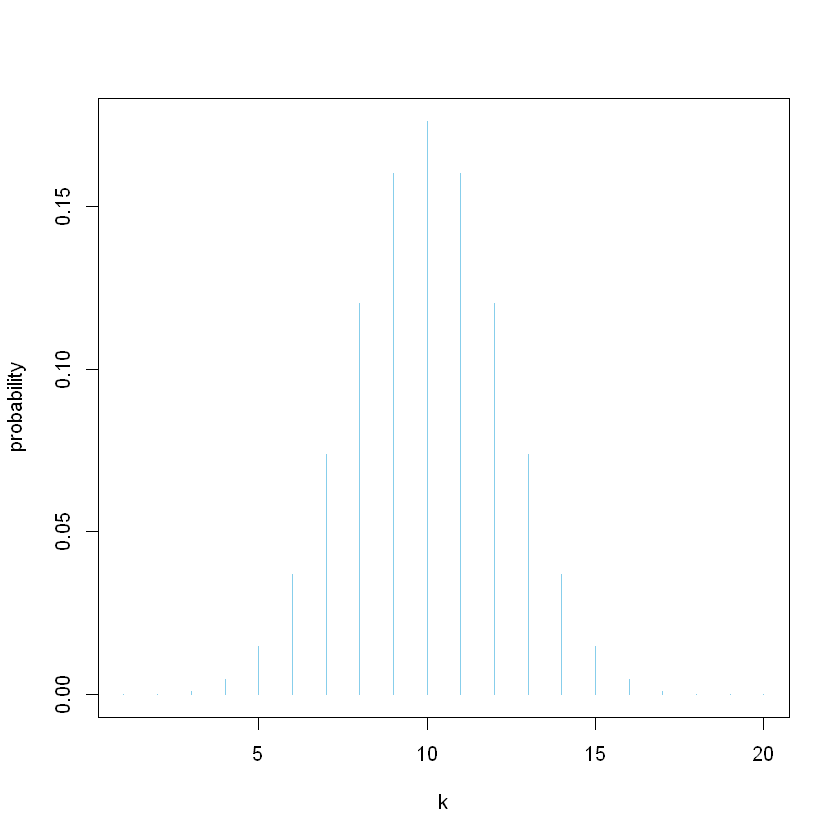

In [2]:
N <- 20 # number of flips
k <- seq(from = 1, to = N, by = 1) # number of successes (e.g. heads)
theta <- 0.5 # probability of success at every flip
y_k <- dbinom(k, size = N, prob = theta) # predicted variable
plot(k, y_k, type = "h", col = "skyblue", ylab = "probability") 

### Bernoulli distribution
For N = 1 and $k \in {0, 1}$ the binomial distribution becomes

$$Bernoulli(\theta, k) = \theta^k (1 - \theta)^{(1 - k)}$$  


### Beta distribution
The beta continuous distribution is defined over the interval [0, 1]. Its shape depends on two positive parameters, a and b. It can be used as conjugate prior distribution of a binomial distribution likelihood.

$$Beta(\theta|a,b) = \frac{\theta^{(a - 1)}(1 - \theta)^{(b - 1)}}{B(a,b)}$$

where

$$B(a,b) = \int^1_0 \theta^{(a - 1)}(1 - \theta)^{(b - 1)}d\theta$$  

is the beta function.

Other parameters of the beta distribution can be computed from the shape parameters $a$ and $b$.  

$$\mu = \frac{a}{a + b}$$  
$$\omega = \frac{a - 1}{a + b - 2}$$  
$$k = a + b$$  

where $\mu$ is the mean of the beta distribution, $\omega$ the mode and $k$ the concentration. The larger is k the narrower, or more concentrated, is the distribution. We can invert the relationships to get the shape parameters $a$ and $b$.

$$a = \omega(k - 2) + 1 $$  
$$b = (1 - \omega)(k - 2) + 1$$    


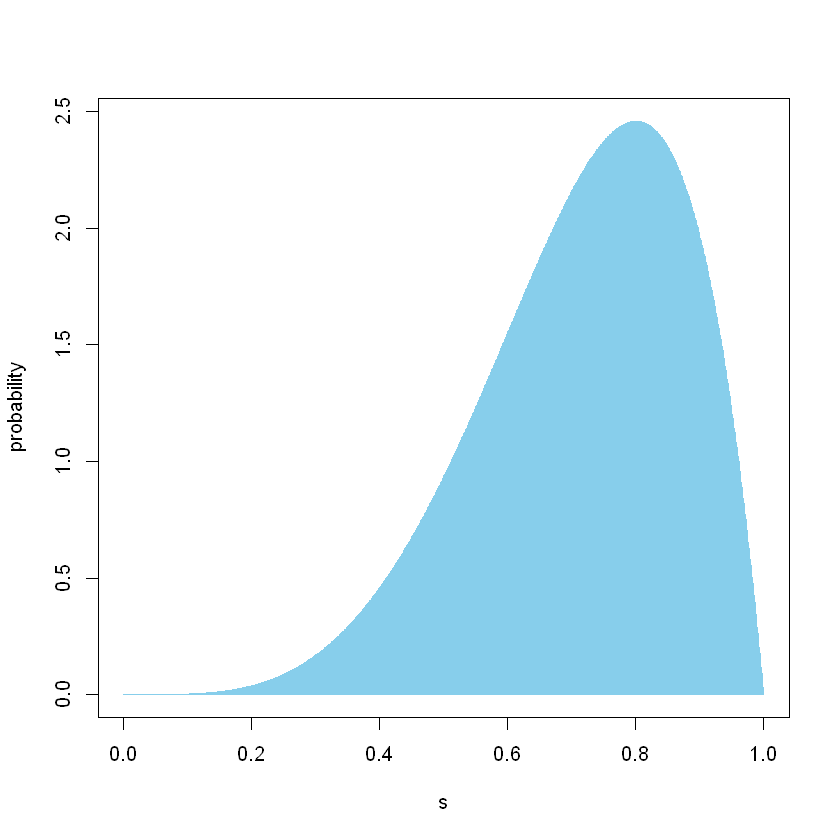

In [4]:
om <- 0.8                      # mode
k <- 7                         # concentration (or spread)
a <- om * (k - 2) + 1          # can be seen as the number of heads in a coin toss
b <- (1 - om) * (k - 2) + 1    # can be seen as the number of tails in a coin toss
s <- seq(from = 0, to = 1, by = 0.001)
plot(s, s^(a - 1) * (1 - s)^(b - 1) / beta(a, b), type = "h", col = "skyblue", ylab = "probability")

### Gamma distribution
The gamma continuous distribution is defined in the interval $[0, + \infty)$ and characterized by two parameters, the scale s and the rate r.

$$Gamma(k| r, s) = \frac{r^sk^{(s - 1)}e^{-rk}}{\Gamma(s)}$$

where

$$\Gamma(s) = \int_0^\infty t^{(s - 1)}e^{-t}dt$$

is the gamma function that can be used to compute the factorial of complex numbers

$$\Gamma(s) = (s - 1)!$$

Other parameters of the gamma distribution can be computed from the shape and the rate

$$\mu = \frac{s}{r}$$     
$$\omega = \frac{s - 1}{r}$$  
$$\sigma = \frac{\sqrt{s}}{r}$$

where $\mu$ is the mean of the gamma distribution, $\omega$ the mode and $\sigma$ the standard deviation. We can invert the relationships to get shape and rate

$$s = 1 + \omega r$$  
$$r = \frac{\mu}{\sigma^2}$$

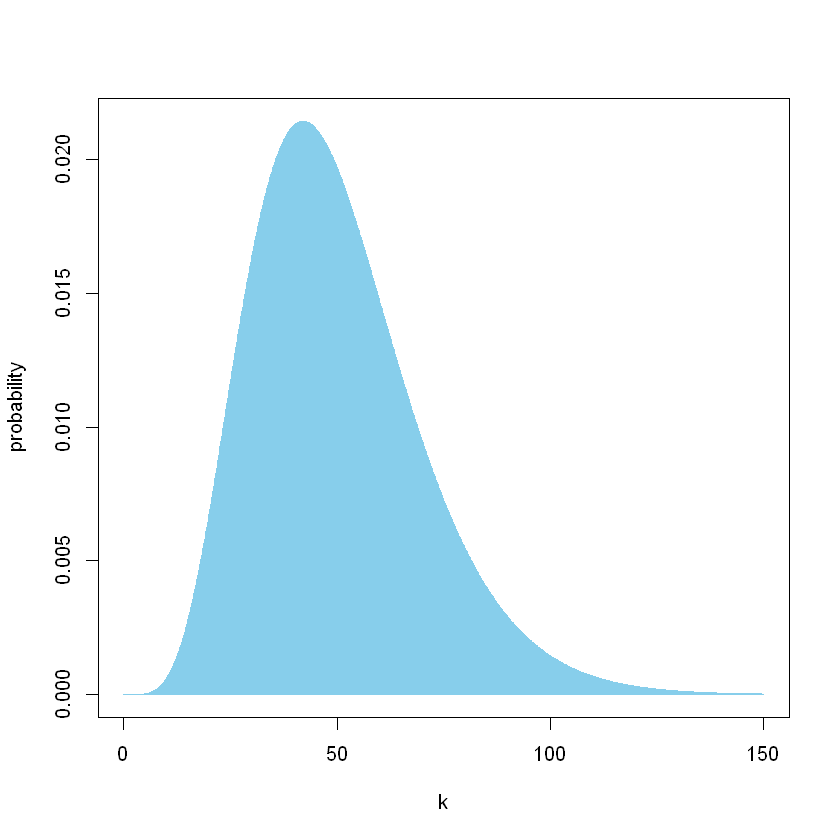

In [23]:
mu <- 50
sd <- 20
mode <- 42
r <- mu / sd^2
s <- 1 + mode * r
k <- seq(from = 0, to = 150, by = 0.1)
plot(k, r^s * k^(s - 1) * exp(-r * k) / gamma(s), type = "h", col = "skyblue", ylab = "probability")

### Poisson distribution
The Poisson discrete distribution is defined over integer values from 0 to $+ \infty$ and can represent the number of occurrences of an event in a time interval.

$$f(k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

$\lambda$ is a real number that represents the mean and the variance of the distribution.

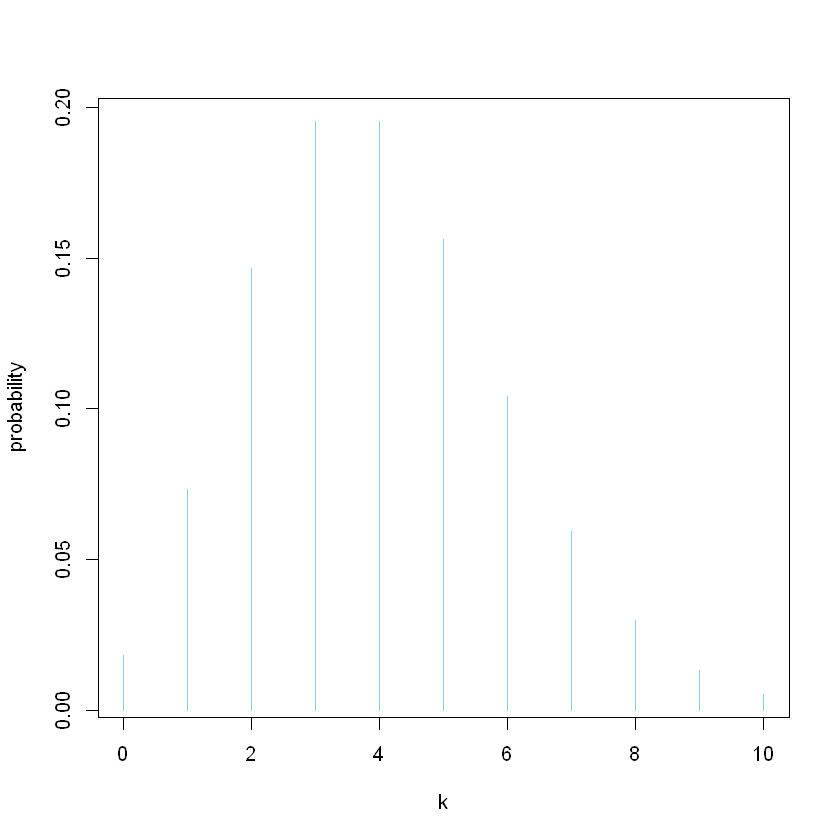

In [22]:
k <- seq(from = 0, to = 10, by = 1)
lambda <- 4
plot(k, lambda^k * exp( - lambda) / factorial(k), type = "h", col = "skyblue", ylab = "probability")

### Gaussian distribution
$$f(y|\mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma} \exp^{ - \frac{1}{2} \frac{(y - \mu)^2}{\sigma^2} }$$

### Exponential distribution

### Student's t distribution
The t distribution is used to compute the true mean and the its standard deviation of a population that is normally distributed. When we compute the mean of a normal distribution we still have to compute its standard deviation that is different from the standard deviation of the normal distribution itself. We can collect more samples and compute the mean for each of them and then we compute the distribution of the mean. Usually we use a small number of samples of the population so that the mean doesn't follow exactly the normal distribution and we better use the Student distribution that works better with sample of small size.